https://pennylane.ai/_images/teleport_circuit_full_gates.svg

In [ ]:
!pip install pennylane
!pip install numpy

1. State preparation

In [2]:
import pennylane as qml
import numpy as np

def state_preparation(state):
    qml.StatePrep(state, wires=["S"])

2. Shared entanglement

In [3]:
def entangle_qubits():
    qml.Hadamard(wires="A")
    qml.CNOT(wires=["A", "B"])

3. Change of basis

In [4]:
def basis_rotation():
    qml.CNOT(wires=["S", "A"])
    qml.Hadamard(wires="S")

4. Measurement

In [5]:
def measure_and_update():
    m0 = qml.measure("S")
    m1 = qml.measure("A")
    qml.cond(m1, qml.PauliX)("B")
    qml.cond(m0, qml.PauliZ)("B")

Creating the Teleport function using the building blocks

In [6]:
dev = qml.device("default.qubit", wires=["S", "A", "B"])
@qml.qnode(dev)
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()
    return qml.density_matrix(wires=["B"])

Testing the Teleportation procedure

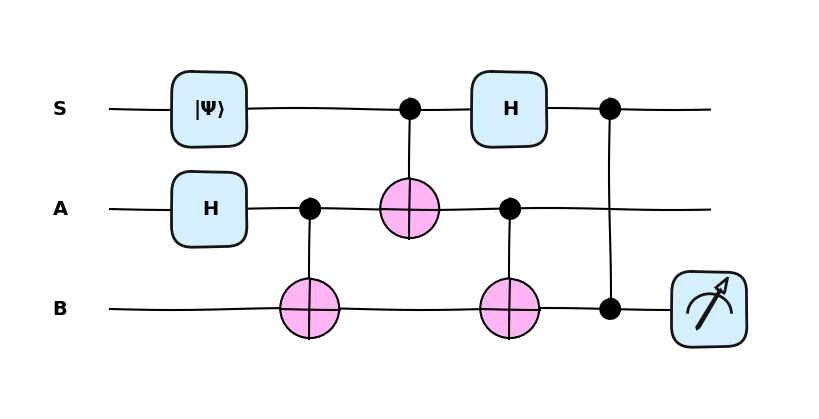

In [7]:
state = np.array([1 / np.sqrt(2) + 0.3j, 0.4 - 0.5j])
_ = qml.draw_mpl(teleport, style="pennylane")(state)

Comparing Bob's final density matrix to Alice's original density matrix:

In [8]:
def teleport_state(state):
    teleported_density_matrix = teleport(state)
    original_density_matrix = qml.math.dm_from_state_vector(state)

    if not np.allclose(teleported_density_matrix, original_density_matrix):
        raise ValueError(
            f"Alice's state ({state}) not teleported properly. "
            f"Final density matrix of Bob's subsystem: {teleported_density_matrix}"
        )
    print("State successfully teleported!")

teleport_state(state)

State successfully teleported!
